# DebtRank using Renormalizable model

## Generating networks with RM

In [396]:
import igraph as ig
import numpy as np
from src import renormalizable_model

#### Testing

In [397]:
strenghts = [(1,1), (0,1), (0,0), (50, 50)]
n=len(strenghts)
g1 = renormalizable_model.create_RM_graph(strenghts, z=0)
g2 = renormalizable_model.create_RM_graph(strenghts, z=1)
g3 = renormalizable_model.create_RM_graph(strenghts, z=np.infty)

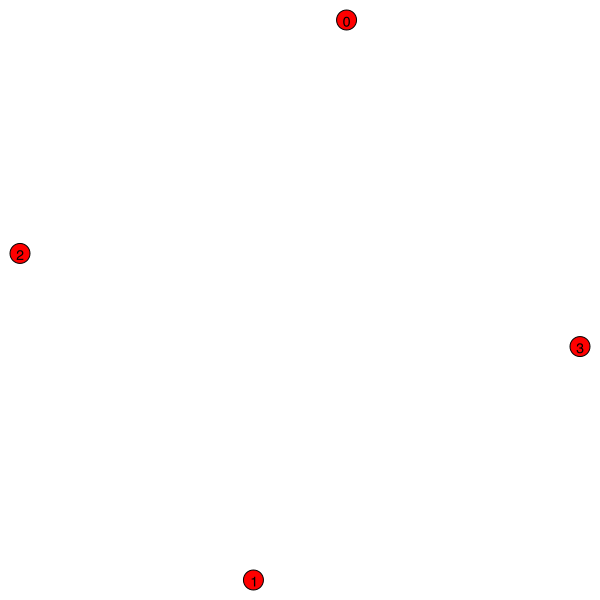

In [398]:
ig.plot(g1, vertex_label=range(n))

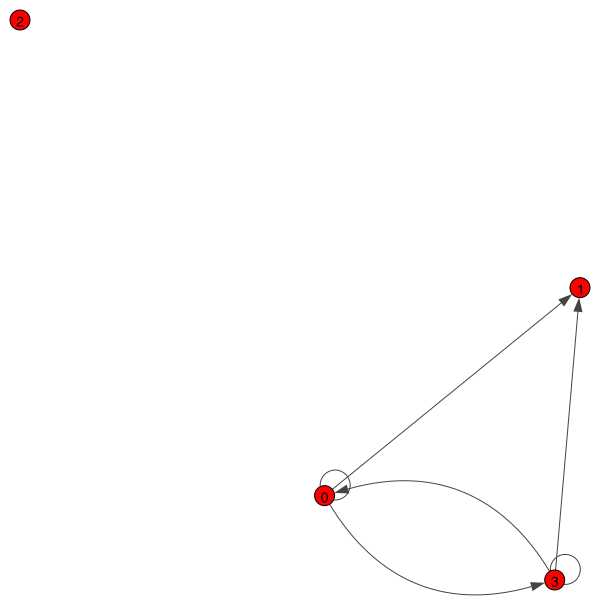

In [399]:
ig.plot(g2, vertex_label=range(n))

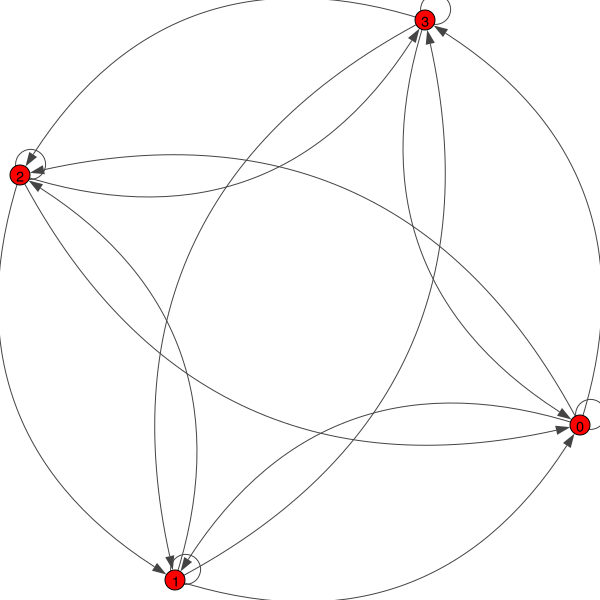

In [400]:
ig.plot(g3, vertex_label=range(n))

In [401]:
g4 = renormalizable_model.create_RM_graph(strenghts, z=1, weighted=True)

Exception: Inconsistent weights

In [402]:
strenghts_2 = [(1,1), (2,0), (0, 50), (50, 2)]
g5 = create_RM_graph(strenghts_2, z=1, weighted=True)

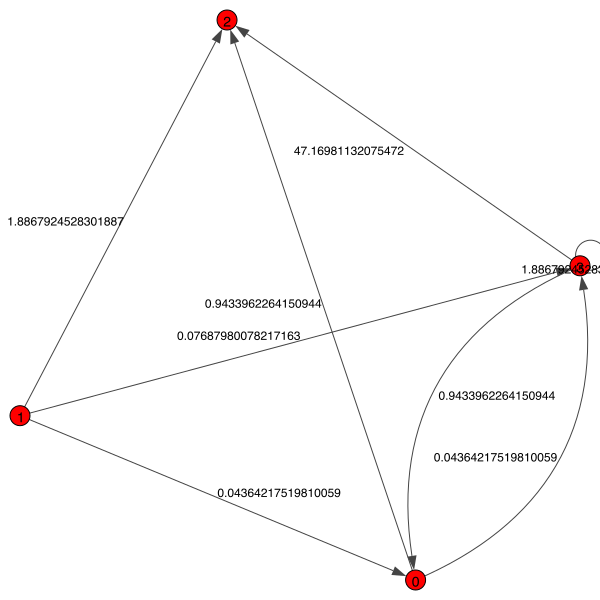

In [403]:
ig.plot(g5, vertex_label=range(n), edge_label = g5.es["weight"])

In [407]:
strenghts_2 = [(1,1), (2,0), (0, 50), (50, 2)]
g6 = renormalizable_model.create_RM_graph(strenghts_2, z=np.infty, weighted=True)

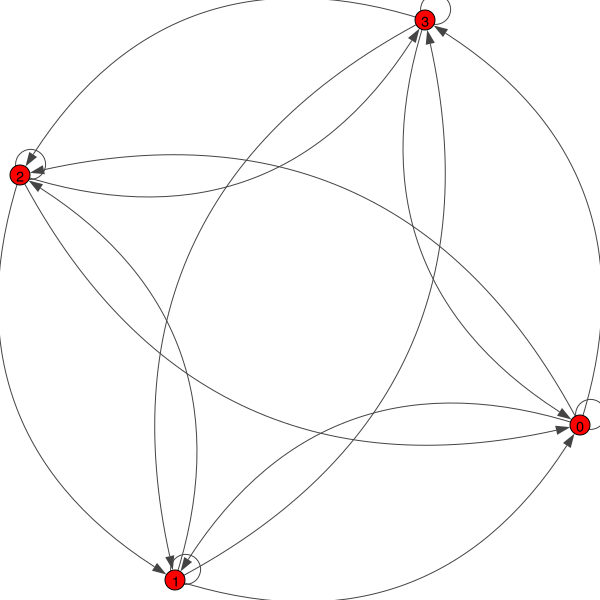

In [408]:
ig.plot(g6, vertex_label=range(n))

In [409]:
strenghts = renormalizable_model.make_strenghts_consistent(np.random.random_sample((100,2)))
ensemble = renormalizable_model.generate_RM_ensemble(1000, strenghts, z=1, weighted=True)

In [ ]:
from multiprocessing import Process

procs = []

for i in in range(10):
        # print(name)
        proc = Process(target=generate_RM_ensemble, args=(100, strenghts, 1, True,))
        procs.append(proc)
        proc.start()

## Coarse graining

#### Merging nodes

In [410]:
from src import coarse_graining

In [411]:
g = ig.Graph(5, [(0,1), (0,2), (1,2), (1,3), (4,2), (0,4)], directed=True)
g.es["weight"] = [1,2,3,4,5,6]

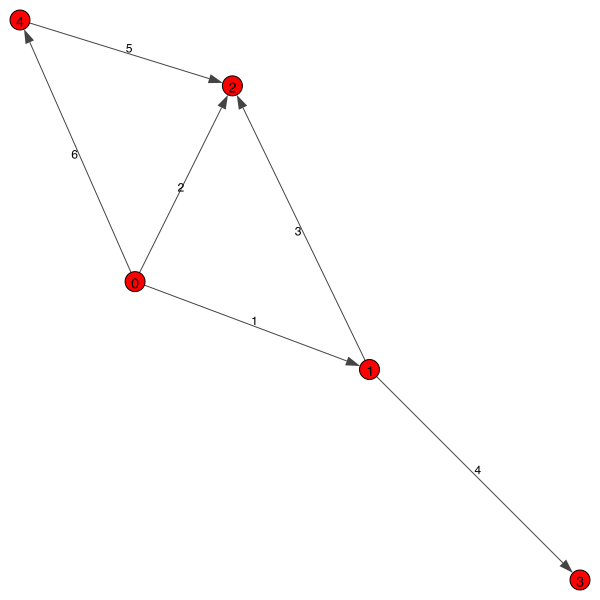

In [412]:
ig.plot(g, vertex_label=g.vs.indices, edge_label = g.es["weight"])

In [413]:
group_sequence = coarse_graining.divide_graph_equally(g, 2)
print(group_sequence)
g_coarse_grained = coarse_graining.coarse_grain_weighted_graph(g, group_sequence)

[array([0, 1, 2]), array([3, 4])]


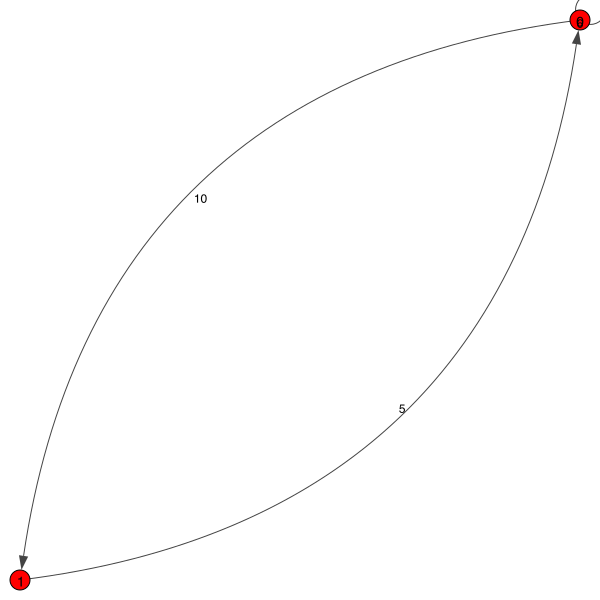

In [414]:
ig.plot(g_coarse_grained, vertex_label=g_coarse_grained.vs.indices, edge_label = g_coarse_grained.es["weight"])

In [415]:
group_sequence = coarse_graining.merge_n_group(g, int(len(g.vs.indices)/2))
print(group_sequence)
g_coarse_grained2 = coarse_graining.coarse_grain_weighted_graph(g, group_sequence)

[[0, 1], [2], [3], [4]]


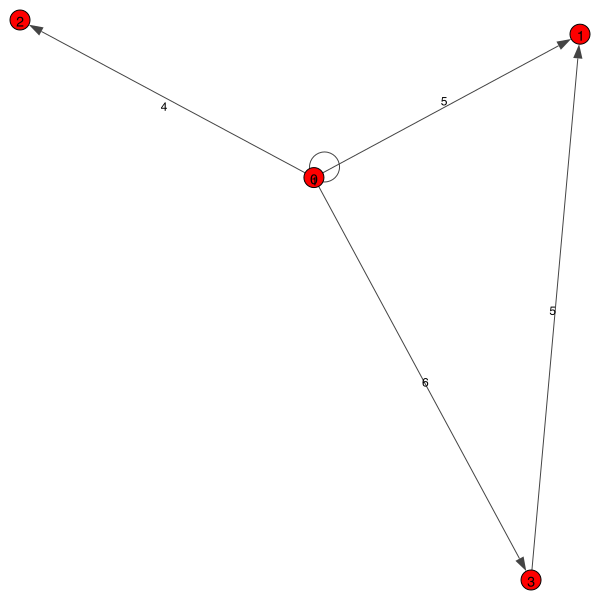

In [416]:
ig.plot(g_coarse_grained2, vertex_label=g_coarse_grained2.vs.indices, edge_label = g_coarse_grained2.es["weight"])

## DebtRank